In [1]:
# 1. Prepare the well-known dataset for hand-written digits (MNIST) and flowers (IRIS). 
import sklearn.datasets as dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mnist = dataset.fetch_openml('mnist_784')
iris = dataset.load_iris()

print(type(mnist.data))
print(type(iris.data))

mnist_data = mnist.data.to_numpy()
mnist_target = mnist.target.to_numpy()
print('mnist data shape : ',mnist_data.shape)
print('mnist target shape : ',mnist_target.shape)

iris_data = iris.data
iris_target = iris.target
print('iris data shape : ', iris_data.shape)
print('iris target shape : ', iris_target.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
mnist data shape :  (70000, 784)
mnist target shape :  (70000,)
iris data shape :  (150, 4)
iris target shape :  (150,)


In [2]:
testset_rate = 0.2

testset_idx = np.sort( np.random.choice(np.arange(150), round(len(iris_data)* testset_rate),replace=False) )
trainingset_idx = np.sort( np.setdiff1d(np.arange(150), testset_idx) )

print('testset_idx \n')
print(testset_idx)
print('\n trainingset_idx \n')
print(trainingset_idx)

iris_test_data = iris_data[testset_idx]
iris_test_target = iris_target[testset_idx]

iris_training_data = iris_data[trainingset_idx]
iris_training_target = iris_target[trainingset_idx]

print('\n test set shape:  ', iris_test_data.shape, iris_test_target.shape )
print('\n training set shape:  ', iris_training_data.shape, iris_training_target.shape )

testset_idx 

[  7   8  13  14  15  16  28  31  34  36  52  54  56  66  67  76  83  85
  90  93  98 106 110 114 118 122 125 131 134 144]

 trainingset_idx 

[  0   1   2   3   4   5   6   9  10  11  12  17  18  19  20  21  22  23
  24  25  26  27  29  30  32  33  35  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  53  55  57  58  59  60  61  62  63  64  65  68
  69  70  71  72  73  74  75  77  78  79  80  81  82  84  86  87  88  89
  91  92  94  95  96  97  99 100 101 102 103 104 105 107 108 109 111 112
 113 115 116 117 119 120 121 123 124 126 127 128 129 130 132 133 135 136
 137 138 139 140 141 142 143 145 146 147 148 149]

 test set shape:   (30, 4) (30,)

 training set shape:   (120, 4) (120,)


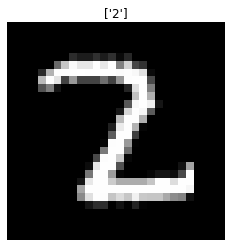

In [3]:
random_index = np.random.choice(70000,1)
mnist_sample = mnist_data[random_index].reshape(28,28)
mnist_sample_Label = mnist_target[random_index]
plt.axis('off')
plt.title(mnist_sample_Label)
plt.imshow(mnist_sample, 'gray')

In [4]:
#2. Design a feed-forward single layer perceptron (SLP), and check the classification accuracy with random weights. 

# activation function
def sigmoid(x):
    x = np.clip( x, -700, 700 ) # overflow 방지
    return 1 / (1 + np.exp(-x))

In [5]:
class SLP_NN():
    def __init__(self, input_size, output_size, hidden_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        # weights
        self.weight1 = np.random.randn(input_size, hidden_size)
        self.weight2 = np.random.randn(hidden_size, output_size)
        
        print('initialization')
        print('input size:    ', self.input_size)
        print('weight1 shape: ', self.weight1.shape)
        print('hidden size:   ', self.hidden_size)
        print('weight2 shape: ', self.weight2.shape)
        print('output size:   ', self.output_size,'\n')
        
    # Forward propagation
    def forward(self, x):
        self.hidden_in  = np.dot(x, self.weight1)
        self.hidden_out = sigmoid(self.hidden_in)
        self.output_in  = np.dot(self.hidden_out, self.weight2)
        self.output_out = sigmoid(self.output_in)
        return self.output_out

target1_idx  = np.where( iris_target == [0] )
target2_idx  = np.where( iris_target == [1] )
binary_subset = np.append(target1_idx, target2_idx)

input_size, output_size, hidden_size = 4, 1, 3
NN = SLP_NN(input_size, output_size, hidden_size)

correct = 0
for i in binary_subset:
    iris_d = iris_data[i]
    iris_t = iris_target[i]
    predict = NN.forward(iris_d)
    if iris_t == np.round(predict):
        correct+=1
        
print('accuracy: ', 100*(correct/len(binary_subset)),' %')
    
    

initialization
input size:     4
weight1 shape:  (4, 3)
hidden size:    3
weight2 shape:  (3, 1)
output size:    1 

accuracy:  50.0  %


In [6]:
# 3. Design a feed-forward multilayer perceptron (MLP), and check the classification accuracy with random weights.

# activation function
def softmax(x):
    exp_x = np.exp(x)
    s = np.sum(exp_x)
    y = exp_x / s
    return y

def sigmoid(x):
    x = np.clip( x, -700, 700 ) # overflow 방지
    return 1 / (1 + np.exp(-x))

class MLP_NN():
    def __init__(self, input_size, output_size, hidden1_size, hidden2_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        # weights
        self.weight1 = np.random.randn(input_size, hidden1_size)
        self.weight2 = np.random.randn(hidden1_size, hidden2_size)
        self.weight3 = np.random.randn(hidden2_size, output_size)
        
        print('initialization')
        print('input size:    ', self.input_size)
        print('weight1 shape: ', self.weight1.shape)
        print('hidden1 size:   ', self.hidden1_size)
        print('weight2 shape: ', self.weight2.shape)
        print('hidden2 size:   ', self.hidden2_size)
        print('weight3 shape: ', self.weight3.shape)
        print('output size:   ', self.output_size,'\n')
        
    # Forward propagation
    def forward(self, x):
        self.hidden1_in  = np.dot(x, self.weight1)
        self.hidden1_out = sigmoid(self.hidden1_in)
        
        self.hidden2_in = np.dot(self.hidden1_out, self.weight2)
        self.hidden2_out = sigmoid(self.hidden2_in)
        
        self.output_in  = np.dot(self.hidden2_out, self.weight3)
        self.output_out = sigmoid(self.output_in)
        return self.output_out


input_size, output_size, hidden1_size, hidden2_size = 784, 10, 1024, 256
NN = MLP_NN(input_size, output_size, hidden1_size, hidden2_size)

initialization
input size:     784
weight1 shape:  (784, 1024)
hidden1 size:    1024
weight2 shape:  (1024, 256)
hidden2 size:    256
weight3 shape:  (256, 10)
output size:    10 



In [27]:
n =0 
for i in range(len(mnist_data)):
    mnist_d = mnist_data[i]
    mnist_t = mnist_target[i]
    predict = NN.forward(mnist_d)
    predict = softmax(predict)
    predict = np.argmax(predict)
    if int(mnist_t) == predict:
        n +=1
    if i % 10000 == 0:
        print(i, '번째: predict', predict, 'label', mnist_t)
        
print('accuracy: ', 100*( n / len(mnist_data)),' %')

0 번째: predict 7 label 5
10000 번째: predict 7 label 3
20000 번째: predict 7 label 5
30000 번째: predict 9 label 3
40000 번째: predict 7 label 7
50000 번째: predict 7 label 3
60000 번째: predict 7 label 7
accuracy:  10.857142857142858  %
